In [1]:
import os
import cv2
from PIL import Image ,ImageEnhance,ImageOps
data_dir='C:\\Users\\AMCT\\Downloads'

In [2]:
def clean_image(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image {image_path}")
            return False
        THREASHOOLD = img.std()
        if THREASHOOLD < 40:
            return False
        
        return True
    except Exception as e:
        print(f"Failed to process {image_path}: {e}")
        return False
def enhance_image(image_path):
    img=Image.open(image_path)
    if img.mode not in ['RGB', 'L']:
        img = img.convert('RGB')
    enhancer=ImageEnhance.Contrast(img)
    enhance=enhancer.enhance(1.5)
    enhancer=ImageEnhance.Brightness(img)
    enhance=enhancer.enhance(1.5)
    enhancer=ImageEnhance.Sharpness(img)
    enhance=enhancer.enhance(2.0)
    has_alpha = 'A' in img.getbands()
    if has_alpha:
        r, g, b, a = img.split()
        img = Image.merge('RGB', (r, g, b))
    else:
        a = None
    img = ImageOps.equalize(img)
    if has_alpha:
        img = Image.merge('RGBA', (*img.split(), a))

    img.save(image_path)
    print(f'image enhance{image_path}')
    

In [3]:
for root ,dris,files in os.walk(data_dir):
    for file in files :
        if file.endswith(('jpg','jpeg','png')):
            file1=os.path.join(root,file)
            if clean_image(file1):
                enhance_image(file1)
            else:
                os.remove(file1)
                

image enhanceC:\Users\AMCT\Downloads\318097505_886082702389775_5074468133178123919_n.jpg
image enhanceC:\Users\AMCT\Downloads\amjad.jpg
image enhanceC:\Users\AMCT\Downloads\HR  Schema.jpg
image enhanceC:\Users\AMCT\Downloads\IMG_6869.jpeg
image enhanceC:\Users\AMCT\Downloads\p1.jpg
image enhanceC:\Users\AMCT\Downloads\p2.jpg
image enhanceC:\Users\AMCT\Downloads\p3.jpg
image enhanceC:\Users\AMCT\Downloads\qrcode_eservices.moe.edu.kw.png
image enhanceC:\Users\AMCT\Downloads\qrcode_web.whatsapp.com.png
image enhanceC:\Users\AMCT\Downloads\web.jpg
image enhanceC:\Users\AMCT\Downloads\WhatsApp Image 2024-01-07 at 23.32.03_fe816308.jpg
image enhanceC:\Users\AMCT\Downloads\WhatsApp Image 2024-02-26 at 16.09.28_60973cdd.jpg
image enhanceC:\Users\AMCT\Downloads\WhatsApp Image 2024-02-27 at 15.42.47_b3a38aa7.jpg
image enhanceC:\Users\AMCT\Downloads\WhatsApp Image 2024-04-26 at 21.41.22_9f6e36fc.jpg
image enhanceC:\Users\AMCT\Downloads\WhatsApp Image 2024-06-01 at 13.45.00_02c62524.jpg
image enha

Found 5063 images belonging to 3 classes.


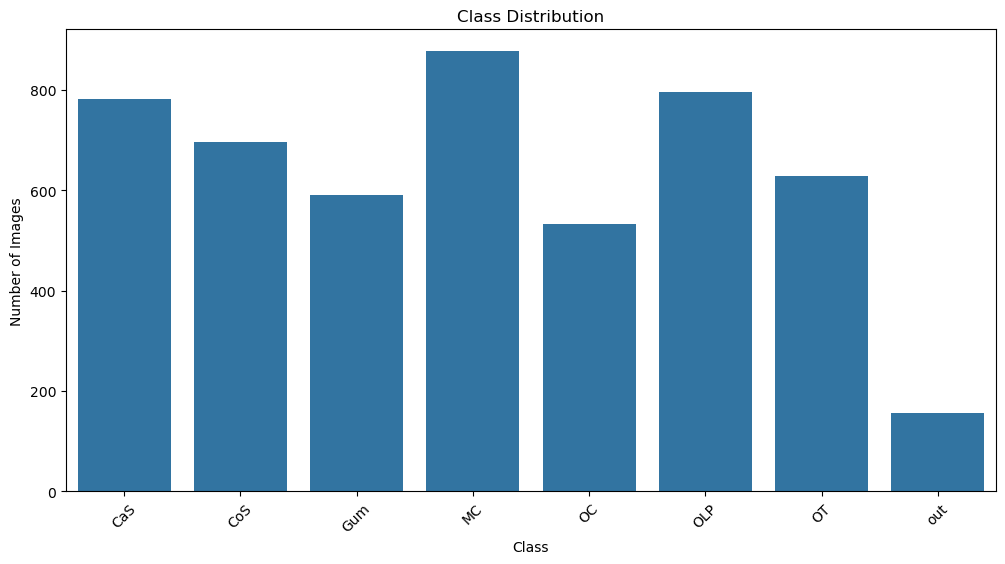

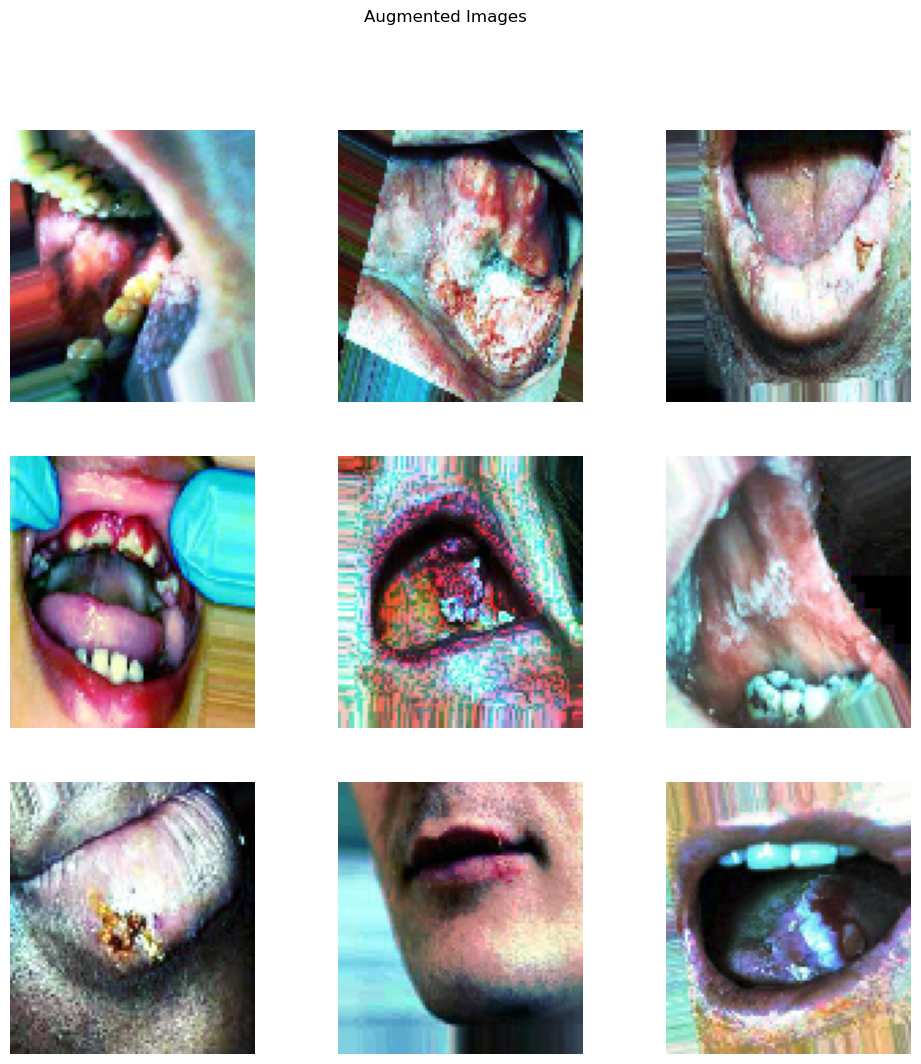

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,
    fill_mode='reflect'
)

def create_train_generator(Training):
    generators = []
    for folder in folders:
        generator = train_datagen.flow_from_directory(
            f'C:\\Users\\AMCT\\Downloads\\Teeth_Dataset',
            target_size=(100,90),
            batch_size=32,
            class_mode='categorical' 
        )
        generators.append(generator)
    return generators

folders = ['Training']
train_generators = create_train_generator(['Training'])

def get_class_distribution(data_dir):
    class_distribution = {}
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                class_name = os.path.basename(root)
                if class_name in class_distribution:
                    class_distribution[class_name] += 1
                else:
                    class_distribution[class_name] = 1
    return class_distribution

data_dir = 'C:\\Users\\AMCT\\Downloads\\Teeth_Dataset'
class_distribution = get_class_distribution(data_dir)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

def display_augmented_images(generator):
    images, labels = next(generator)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    
    plt.suptitle('Augmented Images')
    plt.show()


display_augmented_images(train_generators[0])


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد المولدات (Generators) مع تحسين الصور
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# دالة لإنشاء مولد البيانات (Data Generator)
def create_generator(data_dir, datagen, subset=None):
    generator = datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset=subset
    )
    return generator

# مسار المجلدات
data_dir = 'C:\\Users\\AMCT\\Downloads\\Teeth_Dataset'

# إنشاء المولدات
train_generator = create_generator(data_dir, train_datagen)
val_generator = create_generator(data_dir, val_test_datagen)
test_generator = create_generator(data_dir, val_test_datagen)


Found 5063 images belonging to 3 classes.
Found 5063 images belonging to 3 classes.
Found 5063 images belonging to 3 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,099,715 (72.86 MB)

 Trainable params: 19,099,715 (72.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\AMCT\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


159/159 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5487 - loss: 1.0703 - val_accuracy: 0.5817 - val_loss: 0.9796
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


C:\Users\AMCT\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


159/159 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5752 - loss: 0.9906 - val_accuracy: 0.5817 - val_loss: 0.9780
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.5756 - loss: 0.9815 - val_accuracy: 0.5817 - val_loss: 0.9691
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.5987 - loss: 0.9539 - val_accuracy: 0.5817 - val_loss: 0.9782
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.5769 - loss: 0.9790 - val_accuracy: 0.5817 - val_loss: 0.9690
Epoch 10/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
159/159 ━━━━━━━━━━━━━━━━━━━━ 31s 192ms/step - accuracy: 0.5868 - loss: 0.9646


Test Accuracy: 0.5816709399223328


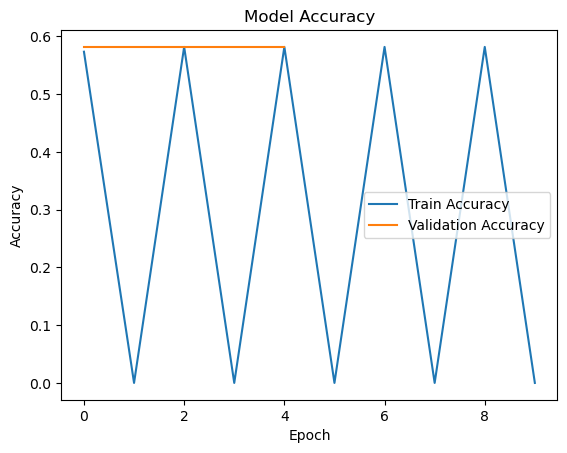

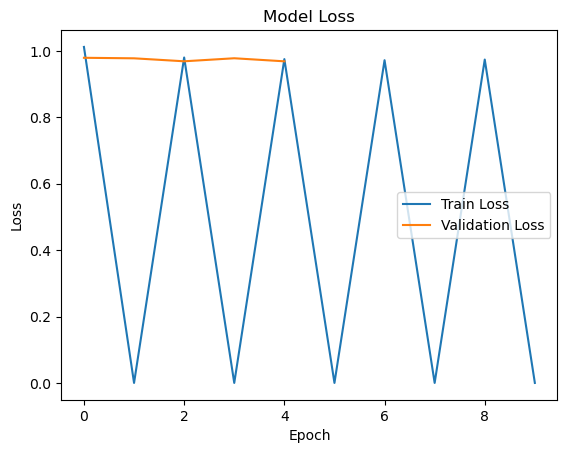

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    model = Sequential()

    # طبقات الالتفاف والتجميع
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # تسطيح البيانات
    model.add(Flatten())

    # طبقات كاملة الربط
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # طبقة الخروج مع عدد من الوحدات تساوي عدد الفئات
    model.add(Dense(3, activation='softmax'))  # استخدم softmax للتصنيف متعدد الفئات

    # تجميع النموذج مع categorical_crossentropy
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# بناء النموذج
model = build_model()

# عرض ملخص النموذج
model.summary()

# تدريب النموذج
history = model.fit(
    train_generators[0],  
    steps_per_epoch=len(train_generators[0]),
    epochs=10,
    validation_data=val_generators[0],  
    validation_steps=len(val_generators[0])
)

# تقييم النموذج
test_loss, test_acc = model.evaluate(test_generators[0], steps=len(test_generators[0]))
print(f"Test Accuracy: {test_acc}")

# حفظ النموذج
model.save('dental_image_classification_model.h5')

# رسم الدقة والخسارة
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
